# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студент гр. 1381 Возмитель Влас Евгеньевич и Тарасов Константин Олегович. Вариант №3.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретное преобразование Фурье применяется для изучения частотного состава дискретного сигнала и имеет следующий вид, где N обозначает количество отсчетов в сигнале, а $x_{k}$ представляет собой дискретный отсчет:
$$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка ($h=1, S_n=e^{i \omega n}$):

$$y_n = \frac{S_{n+1}-S_{n-1}}{2h}$$

Квадратурные формулы численного интегрирования:

1. формула прямоугольников:  $y_{n+1} = y_n + s_{n + \frac{1}{2}}$

2. формула трапеций: $y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right)$

3. формула Симпсона: $y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right)$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

    Формула дискретного сигнала: $$s(t)=\sum_{k=0}^{k=10}A_k cos(\omega_k t + \phi_k)$$

    Случайным образом были сгенерированы $A_k$ и $\varphi_k$
    
    Для амлитуд $A_k$ была выполнена нормализация ($A_k= \frac{A_k}{\sum_{i=0}^{10} A_i}$)


In [39]:
import numpy as np

# Генерация частотных компонент
omega = np.linspace(0, np.pi, num=11)

# Генерация амплитуд случайным образом
amplitudes = np.random.randint(1, 10, size=len(omega))
print("Амплитуды до нормализации:", amplitudes)

# Нормализация амплитуд
normal_amplitudes = amplitudes / np.sum(amplitudes)
print("\nНормализованные амплитуды:", normal_amplitudes)

# Генерация фазовых сдвигов
phase_shifts = np.random.uniform(low=0, high=np.pi/2, size=len(omega))
print("\nФазовые сдвиги:", phase_shifts)

Амплитуды до нормализации: [1 2 8 2 5 4 2 9 7 6 4]

Нормализованные амплитуды: [0.02 0.04 0.16 0.04 0.1  0.08 0.04 0.18 0.14 0.12 0.08]

Фазовые сдвиги: [1.41028527 0.19059489 0.805538   1.49658921 0.58942606 0.14565008
 0.94784454 0.5173282  1.22885054 0.02610598 0.12149592]


2. Визуализировать исходные аналоговый и дискретизированный сигналы.

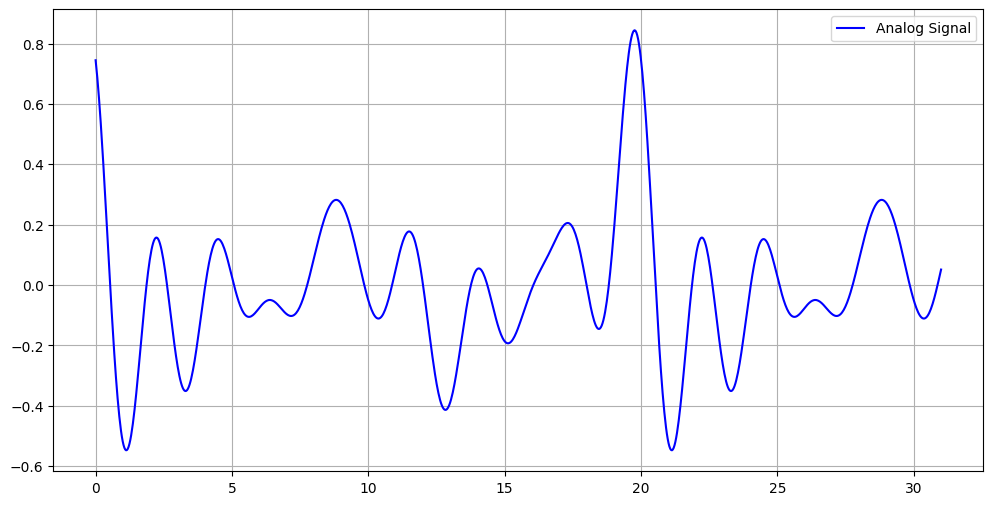

In [40]:
#Аналоговый сигнад
import numpy as np
import matplotlib.pyplot as plt

def signalValue(k):
    total_sum = 0
    for i in range(len(normal_amplitudes)):
        total_sum += normal_amplitudes[i] * np.cos(omega[i] * k + phase_shifts[i])
    return total_sum

time_axis = np.linspace(0, 31, 1000)
signal_values = [signalValue(t) for t in time_axis]

plt.figure(figsize=(12, 6))
plt.plot(time_axis, signal_values, label='Analog Signal', color="blue")
plt.grid(True)
plt.legend()
plt.show()

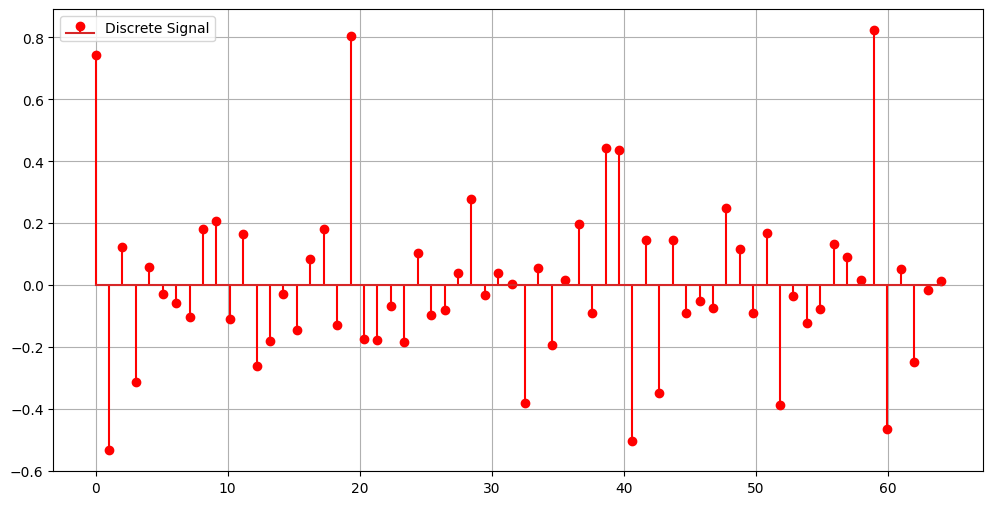

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
num_stems = 64
num_points = 2000

x_values = []
y_values = []
n = 63
start = 0
end = 64
for i in range(n + 1):
    x_val = start + i / (n - 1) * (end - start)
    y_values.append(signalValue(x_val))
    x_values.append(x_val)

plt.grid(True)
plt.stem(
    np.linspace(start, end, num=num_stems),
    y_values,
    linefmt='red',
    markerfmt='red',
    label='Discrete Signal'
)
plt.legend()

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
$$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


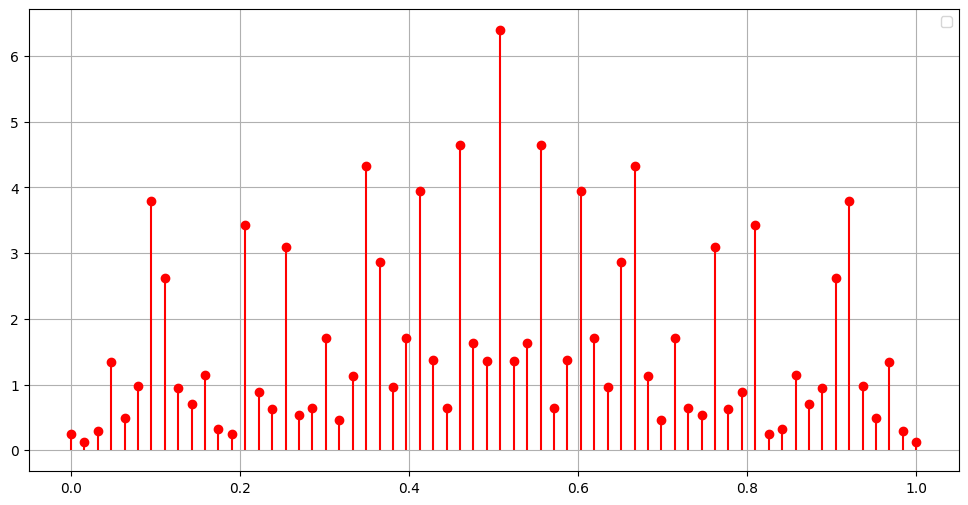

In [42]:
from math import pi
plt.figure(figsize=(12, 6))
def dpf(signal, n):
    X = 0
    for k in range(len(signal)):
        X += signal[k] * np.exp(-2j * pi * k * n / len(signal))

    return X

signal_data = [signalValue(k) for k in range(64)]

dpf_values = []
for i in range(len(signal_data)):
    dpf_values.append(abs(dpf(signal_data, i)))

plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
)
plt.legend()

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

    Уже известные нам формулы для линейного сглаживания:

    - По 5ти: $ H(\omega) = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2}) $

    - По 9ти: $ H(\omega) = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2} + s_{n+3} + s_{n+4}) $

    В результате получим:

    $$H_{5}(f) = \frac{sin(5\pi f)}{5sin(\pi f)}, H_{9}(f) = \frac{sin(9\pi f)}{9sin(\pi f)}$$

    Для упрощения применения фильтра будет использоваться функция библиотеки Numpy:

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

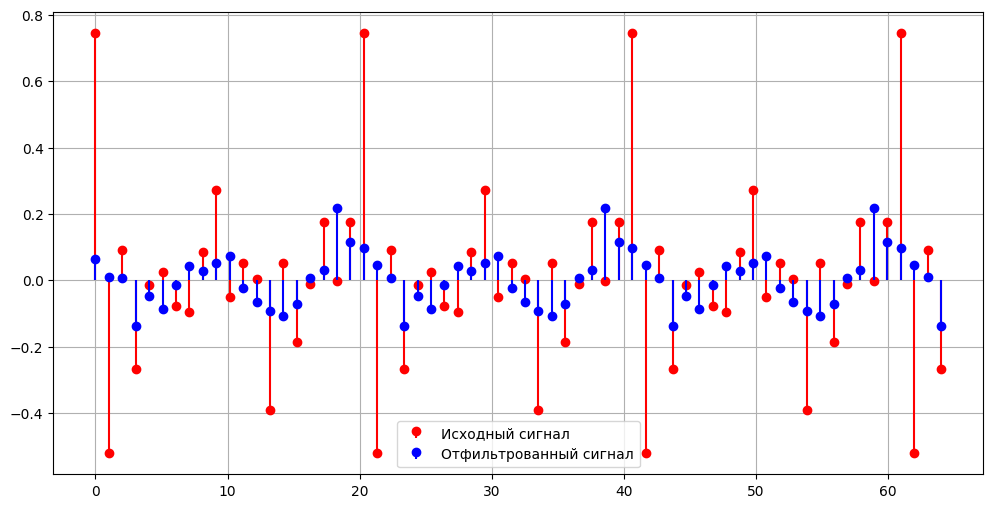

In [43]:
lin_5 = np.convolve(signal_data, np.ones(5) / 5, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    signal_data,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    lin_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

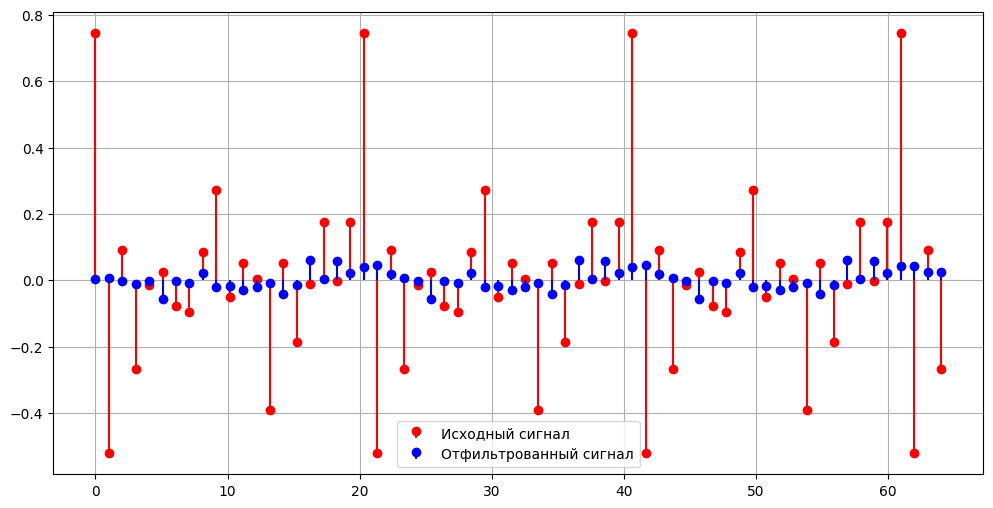

In [44]:
lin_9 = np.convolve(signal_data, np.ones(9) / 9, 'same')

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    signal_data,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 64, num=num_stems),
    lin_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

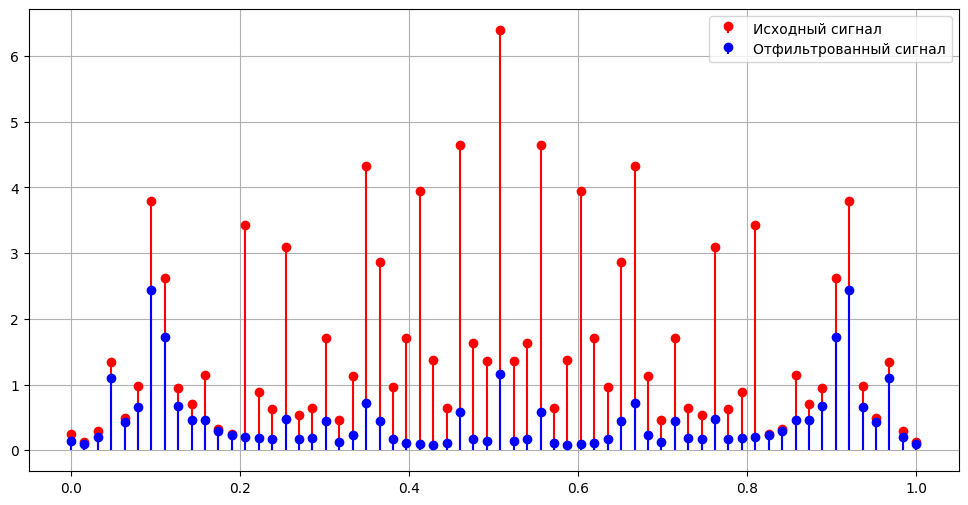

In [45]:
dpf_lin_5 = []
for i in range(len(signal_data)):
    dpf_lin_5.append(abs(dpf(lin_5, i)))

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_lin_5,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

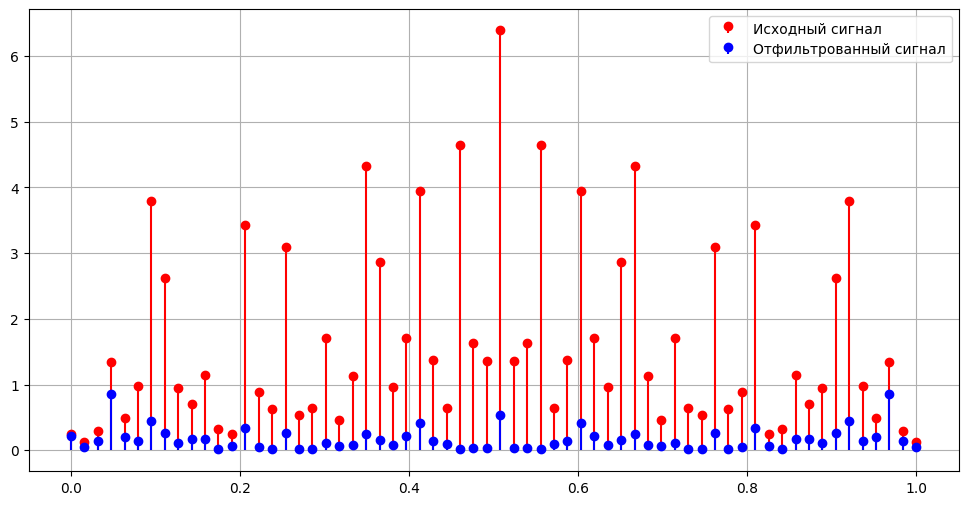

In [46]:
dpf_lin_9 = []
for i in range(len(signal_data)):
    dpf_lin_9.append(abs(dpf(lin_9, i)))

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал'
)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_lin_9,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал'
)
plt.legend()

7. Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

- С увеличением частоты сигнал подвергается более сильному ослаблению.

- Больший фильтр усредняет больше значений.

8. Повторить п. 4–7 для следующих фильтров:

  - Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка: $y_n = \frac{S_{n+1}-S_{n-1}}{2h}$

    Зная, что $S_n=e^{i \omega n}$ и $h = 1$, cоответствующая передаточная функция: $H(\omega)=\frac{e^{i\omega}-e^{-i\omega}}{2}=i\cdot sin(\omega)$

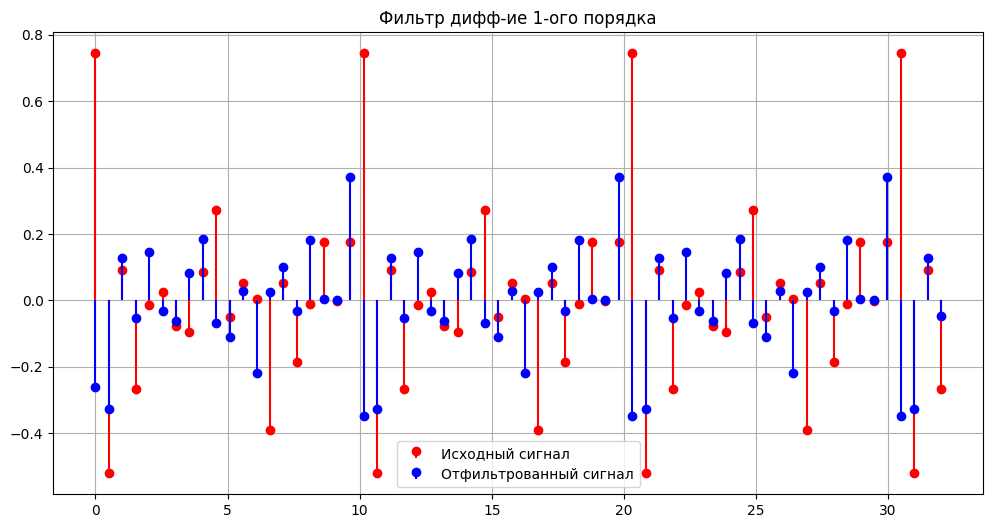

In [48]:
x_diff = np.convolve(signal_data, np.array([1, 0, -1]) / 2, 'same')


plt.figure(figsize=(12, 6))
plt.title("Фильтр дифф-ие 1-ого порядка")
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 32, num=num_stems),
 x_diff,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

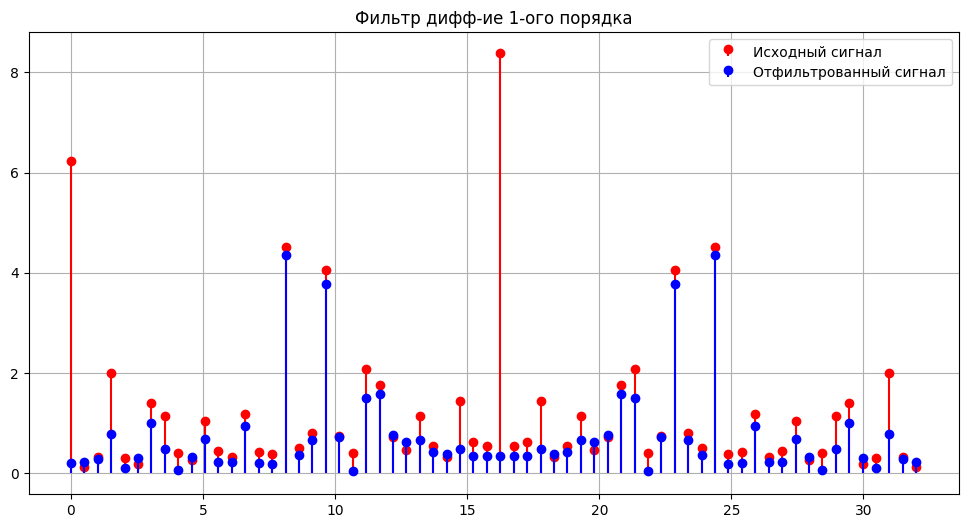

In [ ]:
dpf_diff = []
for i in range(len(signal_data)):
    dpf_diff.append(abs(dpf(x_diff, i)))



plt.figure(figsize=(12, 6))
plt.title("Спектр при фильтре дифф-ие 1-ого порядка")
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 32, num=num_stems),
 dpf_diff,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')
plt.legend()

   - Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

   Формуоа треугольников и ее передаточная функция: $y_{n+1} = y_n + s_{n + \frac{1}{2}}$; $H(\omega)=\frac{1}{2i \cdot sin\left( \frac{\omega}{2} \right)}$
   
   Формула трапеций: $y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right)$; $H(\omega)=\frac{cos\left( \frac{\omega}{2} \right)}{2isin\left( \frac{\omega}{2} \right)}$

   Формула Симпсона: $y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right)$; $H(\omega)=\frac{2+cos(\omega)}{3sin(\omega)}$

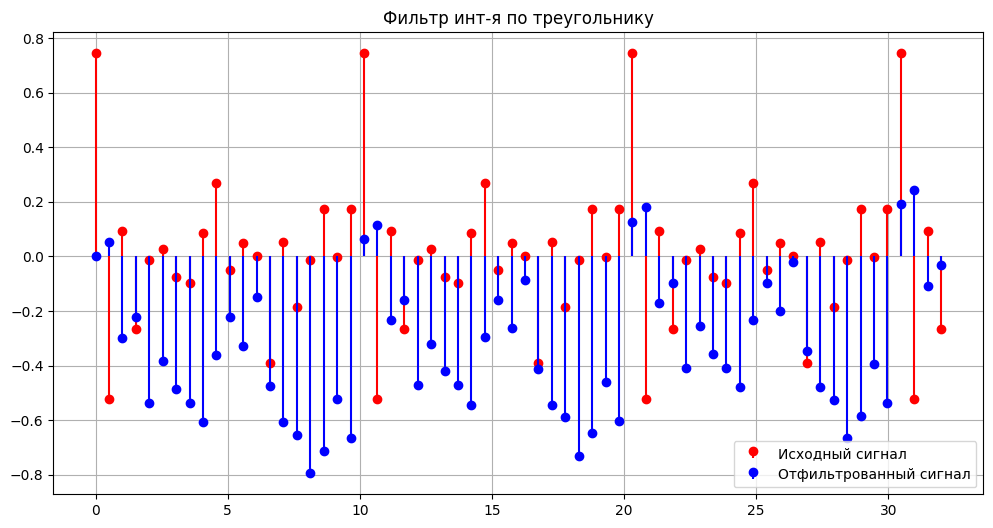

In [49]:
def rec(signal_data):
    res = [0] * len(signal_data)
    for i in range(0, len(res) - 1):
        res[i + 1] = res[i] + signalValue(i + 1 / 2)
    return res

x_rect = rec(signal_data)

plt.figure(figsize=(12, 6))
plt.title('Фильтр инт-я по треугольнику')
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(
    np.linspace(0, 32, num=num_stems),
    x_rect,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

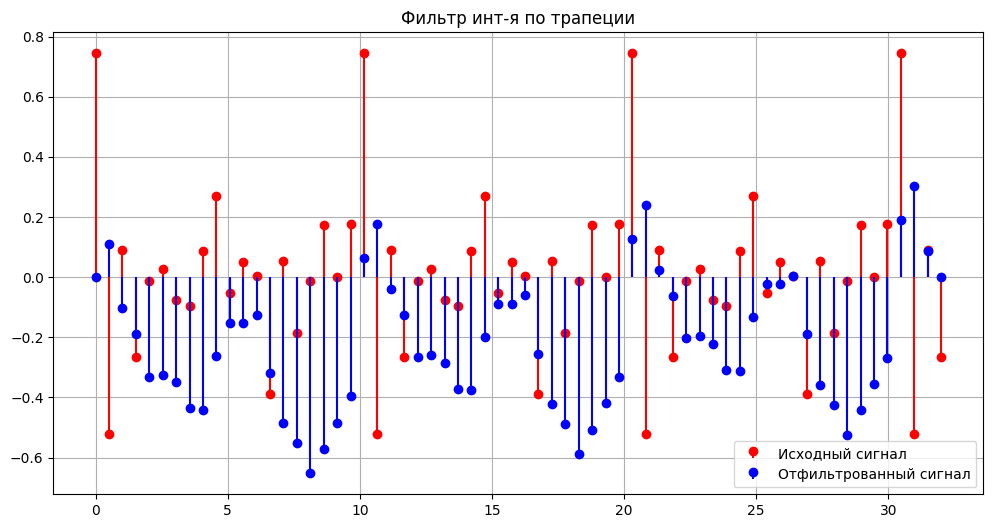

In [50]:
def trap(signal_data):
    res = [0] * len(signal_data)
    for i in range(0, len(res) - 1):
        res[i + 1] = res[i] + (signal_data[i] + signal_data[i + 1]) / 2
    return res

x_trap = trap(signal_data)

plt.figure(figsize=(12, 6))
plt.title('Фильтр инт-я по трапеции')
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(
    np.linspace(0, 32, num=num_stems),
    x_trap,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

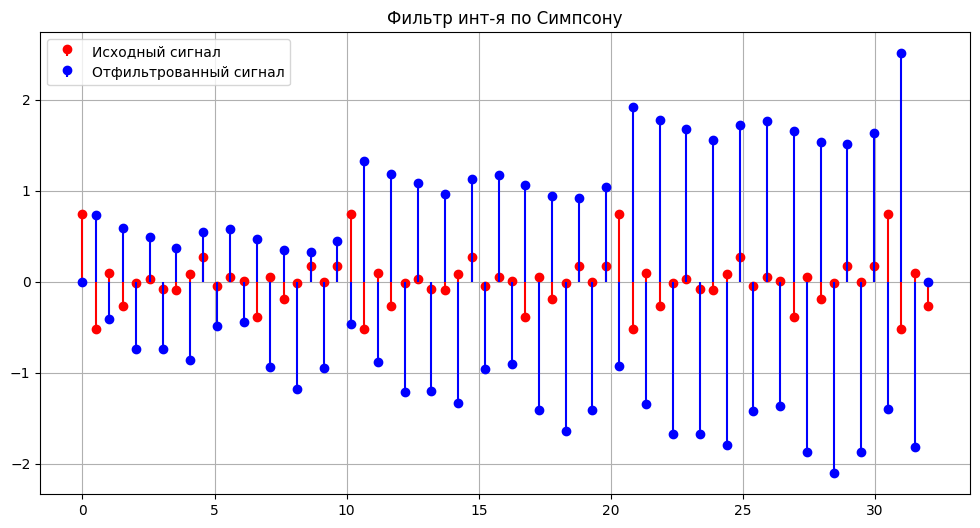

In [51]:
def simpson(signal_data):
    res = [0] * len(signal_data)
    for i in range(0, len(res) - 2):
        res[i + 1] = res[i - 1] + (signal_data[i - 1] + 4 * signal_data[i] + signal_data[i + 1]) / 3
    return res

x_sim = simpson(signal_data)

plt.figure(figsize=(12, 6))
plt.title('Фильтр инт-я по Симпсону')
plt.grid(True)
plt.stem(
    np.linspace(0, 32, num=num_stems),
    signal_data,
    basefmt=" ",
    linefmt='red',
    markerfmt='red',
    label='Исходный сигнал')
plt.stem(
    np.linspace(0, 32, num=num_stems),
    x_sim,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

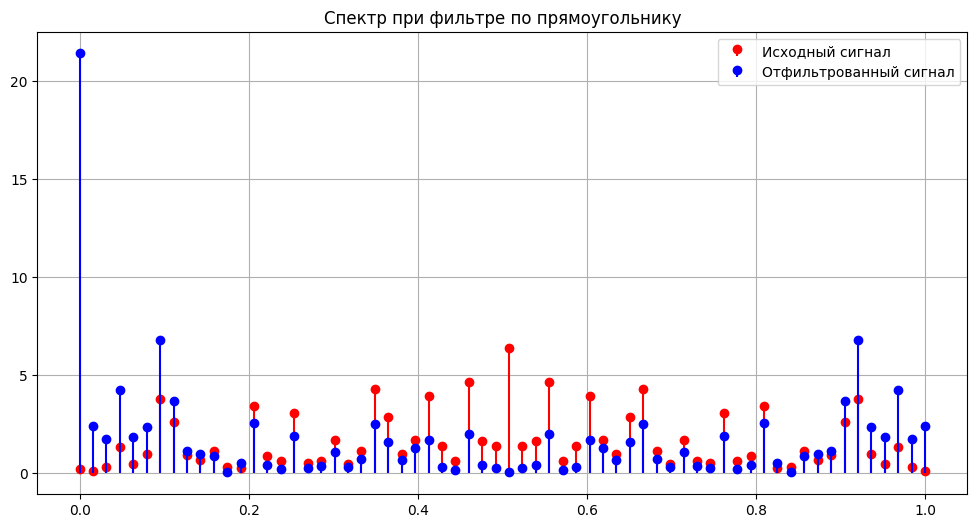

In [52]:
dpf_rect = []
for i in range(len(signal_data)):
    dpf_rect.append(abs(dpf(x_rect, i)))


plt.figure(figsize=(12, 6))
plt.title('Спектр при фильтре по прямоугольнику')
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
    dpf_rect,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

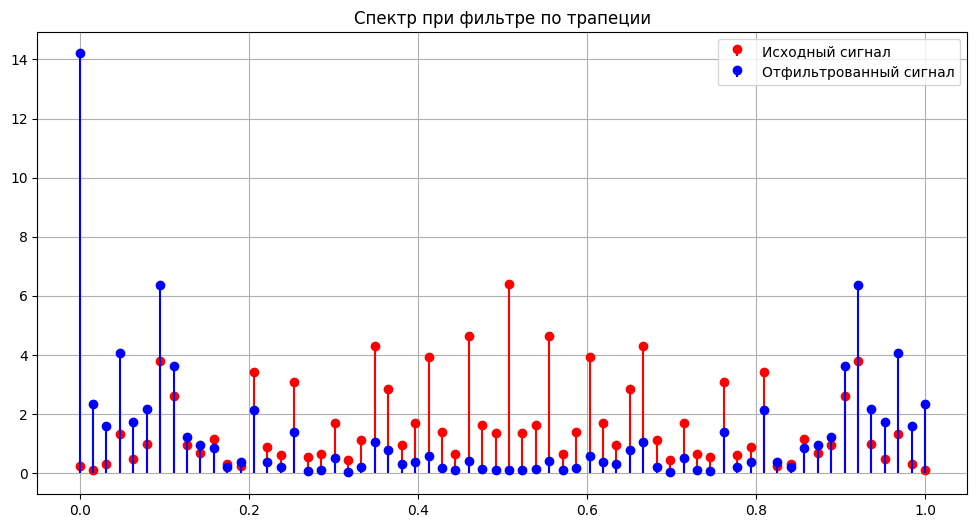

In [53]:
dpf_trap = []
for i in range(len(signal_data)):
    dpf_trap.append(abs(dpf(x_trap, i)))


plt.figure(figsize=(12, 6))
plt.title('Спектр при фильтре по трапеции')
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
    dpf_trap,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

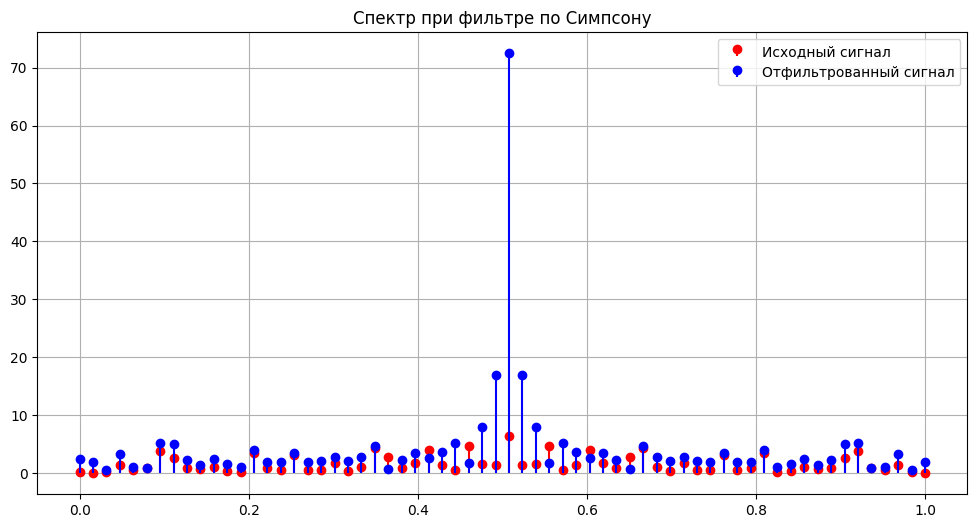

In [54]:
dpf_sim = []
for i in range(len(signal_data)):
    dpf_sim.append(abs(dpf(x_sim, i)))


plt.figure(figsize=(12, 6))
plt.title('Спектр при фильтре по Симпсону')
plt.grid(True)
plt.stem(
    np.linspace(0, 1, num=num_stems),
    dpf_values,
         basefmt=" ",
         linefmt='red',
         markerfmt='red',
         label='Исходный сигнал')
plt.stem(np.linspace(0, 1, num=num_stems),
    dpf_sim,
    basefmt=" ",
    linefmt='blue',
    markerfmt='blue',
    label='Отфильтрованный сигнал')

plt.legend()

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

- Все используемые фильтры работают в соответствии с их теоретическими передаточными функциями.
- Фильтры с большим количеством точек обеспечивают более сильное сглаживание, но могут терять больше деталей на высоких частотах.
- Полиномы высших степеней позволяют сохранить больше информации на средних частотах, предоставляя более гибкие возможности для обработки сигналов.

- Дифференцирующий фильтр подалвяет низкие и высокие частоты, но сохраняет средние.
- Фильтры на основе численного интегрирования по формулам трапеции и прямоугольника подавляют низкие частоты и усиливают средние с высокими частотами.
- Формула Симпсона же проспускает средние частоты.

## Выводы

В процессе лабораторной работы сформировали дискретный сигнал, затем применили линейные и рекурсивные фильтры, основанные на численном дифференцировании и интегрировании (методы прямоугольников, трапеций, Симпсона). С использованием дискретного преобразования Фурье вычислили спектры исходного и отфильтрованного сигналов. Проведен анализ изменений сигнала под воздействием фильтров.